# Notes of SVM

## 1. Introduction

http://docs.opencv.org/2.4/doc/tutorials/ml/introduction_to_svm/introduction_to_svm.html


## 2. Mathematic formulation

[PDF] LIBSVM: A Library for Support Vector Machines

[PDF] C. Cortes and V. Vapnik. Support-vector network. Machine Learning, 20:273-297, 1995.


## 3. sklearn SVM

### 3.1 Tutorial

http://scikit-learn.org/stable/modules/svm.html

### 3.2 Examples

http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py

http://scikit-learn.org/stable/auto_examples/applications/svm_gui.html#sphx-glr-auto-examples-applications-svm-gui-py

http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py

http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py

http://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py

http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

http://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py


In [33]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mc
    
def fxy2d(m=100, nclass=2, center=[[1,0], [0,1]]):
    ds = np.random.normal(0, 1.0, m)
    angs = np.random.rand(m)
    labels = np.random.rand(m)

    x = np.zeros([2, m]) 
    y = np.zeros([nclass, m]) 
    
    for i in range(nclass):
        index = (labels>=i*1.0/nclass) * (labels<(i+1)*1.0/nclass)
        x[0,index] = center[i][0] + ds[index]*np.cos(angs[index]*np.pi*2)
        x[1,index] = center[i][1] + ds[index]*np.sin(angs[index]*np.pi*2)
        y[i,index] = 1    
    return x, y

def fxy2d_circle(m=100, nclass=2):
    ds = np.random.normal(0, 0.3, m)
    angs = np.random.rand(m)
    labels = np.random.rand(m)

    x = np.zeros([2, m])
    y = np.zeros([nclass, m]) 
    
    rs = [0, 2]
    for i in range(nclass):
        index = (labels>=i*1.0/nclass) * (labels<(i+1)*1.0/nclass)
        x[0,index] = (rs[i] + ds[index])*np.cos(angs[index]*np.pi*2)
        x[1,index] = (rs[i] + ds[index])*np.sin(angs[index]*np.pi*2)
        y[i,index] = 1    
    return x, y



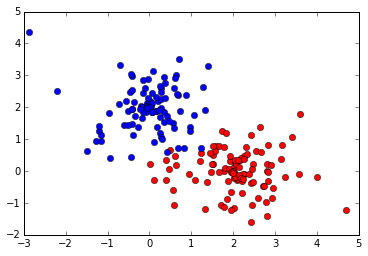

In [40]:
nclass = 2
cstrs = ['ro','bo','go','mo','co','yo']
x,y = fxy2d(m=200, nclass=nclass, center=[[2,0], [0,2]])

for i in range(nclass):
    plt.plot(x[0, y[i,:]==1], x[1, y[i,:]==1], cstrs[i])


In [41]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x.T, y.T[:,0])  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<matplotlib.colorbar.Colorbar instance at 0x10a23e290>

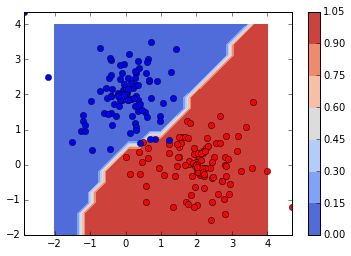

In [44]:
# prediction
npic = 21
xx,yy = np.meshgrid(np.linspace(-2,4,npic), np.linspace(-2,4,npic))
pr = clf.predict(np.append( xx.reshape(npic**2, 1), yy.reshape(npic**2, 1), axis=1))

for i in range(nclass):
    plt.plot(x[0, y[i,:]==1], x[1, y[i,:]==1], cstrs[i])
plt.contourf(xx,yy, pr.reshape(npic,npic), cmap=cm.coolwarm)
plt.colorbar()



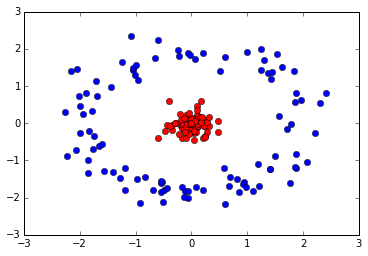

In [49]:
nclass = 2
cstrs = ['ro','bo','go','mo','co','yo']
x,y = fxy2d_circle(m=200, nclass=nclass)

for i in range(nclass):
    plt.plot(x[0, y[i,:]==1], x[1, y[i,:]==1], cstrs[i])


<matplotlib.colorbar.Colorbar instance at 0x10b61f1b8>

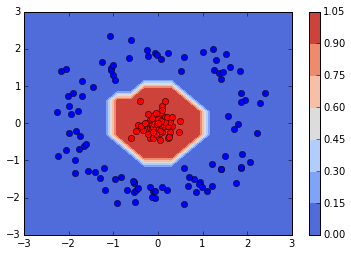

In [50]:
clf = svm.SVC()
clf.fit(x.T, y.T[:,0])  

# prediction
npic = 21
xx,yy = np.meshgrid(np.linspace(-3,3,npic), np.linspace(-3,3,npic))
pr = clf.predict(np.append( xx.reshape(npic**2, 1), yy.reshape(npic**2, 1), axis=1))

for i in range(nclass):
    plt.plot(x[0, y[i,:]==1], x[1, y[i,:]==1], cstrs[i])
plt.contourf(xx,yy, pr.reshape(npic,npic), cmap=cm.coolwarm)
plt.colorbar()
